Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке.<br>
Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recall для различных порогов вероятности.<br>
Дополнительное задание(не обязательно): Получите такие же характеристики для линейной регрессии и сравните две модели.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
class logistic_regression:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations=1000
        self.eta=eta
    def _log_grad(self, X, target):
        m = X.shape[0]
        y=(2*target-1)
        score=np.dot(X, self.w.T).flatten()+self.w0
        Z=-y/(m*(1+np.exp(y*score)))
        grad=Z[np.newaxis, :].dot(X)
        return grad/m, np.sum(Z)/m
    def _optimize(self, X, target):
        for i in range(self.n_iterations):        
            grad_w, grad_w0 = self._log_grad(X, target)
            self.w = self.w-self.eta * grad_w
            self.w0 = self.w0 - self.eta * grad_w0
    def fit(self, X, target):
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        self._optimize(X, target)
    def predict_proba(self, X):  
        '''
        Рассчёт вероятности
        '''
        score=X.dot(self.w.T).flatten()+self.w0
        return 1/(1+np.exp(-score))
    def predict(self, X, thr=0.5):
        proba=self.predict_proba(X)
        y_predicted = np.zeros(proba.shape, dtype=bool) 
        y_predicted[proba>thr]=1
        y_predicted[proba<=thr]=0
        return y_predicted

In [3]:
def confusion(predicted, actual):
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

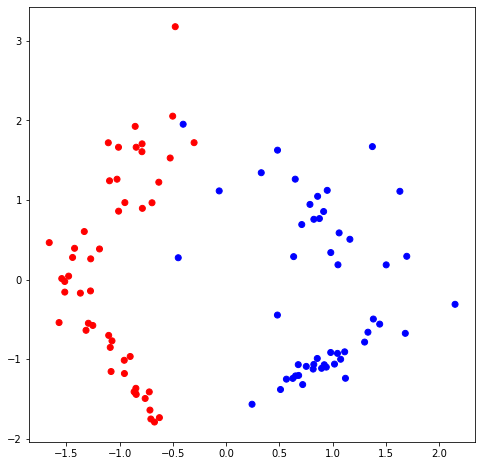

In [4]:
# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)

# изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [5]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=42)

In [6]:
mod=logistic_regression()
mod.fit(X_train, y_train)
y_predicted_test = mod.predict(X_test)
y_predicted_train = mod.predict(X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {mod.w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[ 0.30963883 -0.06831004]]
Точность на обучающей выборке: 97.143
Точность на тестовой выборке: 96.667


In [7]:
def metrics(X, y, prob):
    TP = confusion(mod.predict(X, prob), y)['TP']
    FP = confusion(mod.predict(X, prob), y)['FP']
    FN = confusion(mod.predict(X, prob), y)['FN']
    TN = confusion(mod.predict(X, prob), y)['TN']
    
    Precision = round(TP / (TP + FP),4) if (TP+FP)!=0 else 1
    Recall = round(TP / (TP + FN),4)
    FPR = round(FP / (FP + TN),4)
    print(f'Для порога по вероятности {p} на тестовой выборке имеем:\nPrecision = {Precision}, \
    Recall = TPR = {Recall}, \
    FPR = {FPR}')
    return Precision, Recall

In [8]:
proba=np.unique(mod.predict_proba(X_test))
proba

array([0.36659829, 0.38234716, 0.38501771, 0.38657276, 0.38944167,
       0.39543157, 0.40245842, 0.40803208, 0.41360965, 0.42422899,
       0.42692882, 0.43561562, 0.44329751, 0.44623287, 0.45707606,
       0.45761897, 0.50243066, 0.50942069, 0.52848927, 0.54288607,
       0.54386408, 0.54451869, 0.5452623 , 0.55047631, 0.57256387,
       0.59040915, 0.59552941, 0.59882982, 0.60607971, 0.61196066])

In [9]:
pr_list = []
for p in proba:
    precision, recall = metrics(X_test, y_test, p)
    pr_list.append([recall, precision])

Для порога по вероятности 0.36659828815399365 на тестовой выборке имеем:
Precision = 0.5172,     Recall = TPR = 1.0,     FPR = 0.9333
Для порога по вероятности 0.38234715605474573 на тестовой выборке имеем:
Precision = 0.5357,     Recall = TPR = 1.0,     FPR = 0.8667
Для порога по вероятности 0.38501771188902856 на тестовой выборке имеем:
Precision = 0.5556,     Recall = TPR = 1.0,     FPR = 0.8
Для порога по вероятности 0.3865727623232509 на тестовой выборке имеем:
Precision = 0.5769,     Recall = TPR = 1.0,     FPR = 0.7333
Для порога по вероятности 0.3894416739270924 на тестовой выборке имеем:
Precision = 0.6,     Recall = TPR = 1.0,     FPR = 0.6667
Для порога по вероятности 0.39543157192138945 на тестовой выборке имеем:
Precision = 0.625,     Recall = TPR = 1.0,     FPR = 0.6
Для порога по вероятности 0.4024584154427678 на тестовой выборке имеем:
Precision = 0.6522,     Recall = TPR = 1.0,     FPR = 0.5333
Для порога по вероятности 0.40803207679311465 на тестовой выборке имеем:
Pr

Расчитаем вероятности принадлежности к "положительному" классу объектов тестовой выборки, используя predict_proba.

In [10]:
predict_list = mod.predict_proba(X_test).tolist()
predict_list
real_class = y_test.tolist()
predict_real_class = list(zip(predict_list, real_class))

Отсоритируем объекты в порядке увеличения вероятности принадлежности к "положительному" классу и построим график ROC_AUC.

In [11]:
predict_real_class.sort(reverse = True)
predict_real_class

[(0.6119606620548288, 1),
 (0.6060797090256268, 1),
 (0.5988298164311372, 1),
 (0.595529406867744, 1),
 (0.5904091490902769, 1),
 (0.5725638708517513, 1),
 (0.5504763137610595, 1),
 (0.5452623018374647, 1),
 (0.5445186856364503, 1),
 (0.5438640833263784, 1),
 (0.5428860731812319, 1),
 (0.5284892729173355, 1),
 (0.5094206949536595, 1),
 (0.5024306580531034, 1),
 (0.4576189746727104, 0),
 (0.45707606175936705, 0),
 (0.4462328703362393, 0),
 (0.4432975100979889, 0),
 (0.4356156215147782, 1),
 (0.42692882222467327, 0),
 (0.4242289876718357, 0),
 (0.41360964975266973, 0),
 (0.40803207679311465, 0),
 (0.4024584154427678, 0),
 (0.39543157192138945, 0),
 (0.3894416739270924, 0),
 (0.3865727623232509, 0),
 (0.38501771188902856, 0),
 (0.38234715605474573, 0),
 (0.36659828815399365, 0)]

In [12]:
n_ordinate = sum([el[1] for el in predict_real_class])
n_abscissa = len(predict_real_class) - n_ordinate
print(f'n_abscissa= {n_abscissa}, n_ordinate= {n_ordinate}')

n_abscissa= 15, n_ordinate= 15


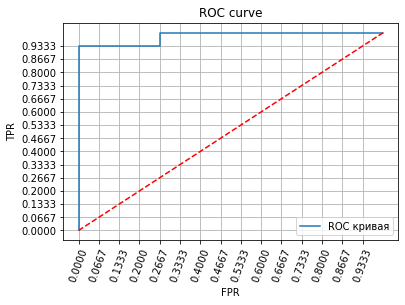

In [13]:
x = 0
y = 0
roc_auc = [(0,0)]
for el in predict_real_class:
    if el[1] == 0:
        x = x + 1/n_abscissa
    else:
        y = y + 1/n_ordinate
    roc_auc.append((x,y))

plt.plot([point[0] for point in roc_auc], [point[1] for point in roc_auc], label='ROC кривая')
plt.plot([0,1],[0,1], 'r--')

plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xticks(np.arange(0, 1, step=1/n_abscissa),rotation=70)
plt.yticks(np.arange(0, 1, step=1/n_ordinate))
plt.legend(loc="lower right")

plt.grid()
plt.show()

Построим ROC кривую, воспользовавшись библиотекой sklearn

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(real_class, mod.predict_proba(X_test))

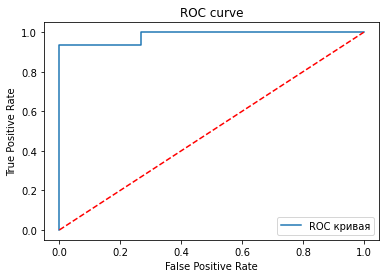

In [15]:
plt.plot(fpr, tpr, label='ROC кривая')
plt.plot([0, 1], [0, 1], 'r--')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

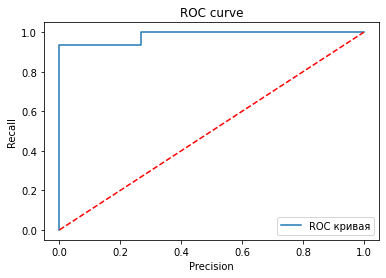

In [16]:
x = 0
y = 0
roc_auc = [(0,0)]
for el in predict_real_class:
    if el[1] == 0:
        x = x + 1/n_abscissa
    else:
        y = y + 1/n_ordinate
    roc_auc.append((x,y))

plt.plot([point[0] for point in roc_auc], [point[1] for point in roc_auc], label='ROC кривая')
plt.plot([0,1],[0,1], 'r--')

plt.title('ROC curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc="lower right")
plt.show()

Построим PR-AUC

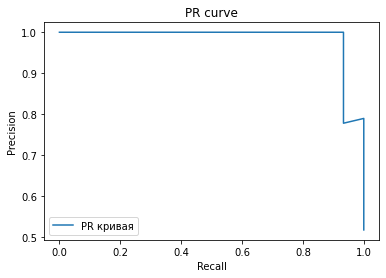

In [17]:
plt.plot([point[0] for point in pr_list], [point[1] for point in pr_list], label='PR кривая')

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, treshold = precision_recall_curve(real_class, mod.predict_proba(X_test))

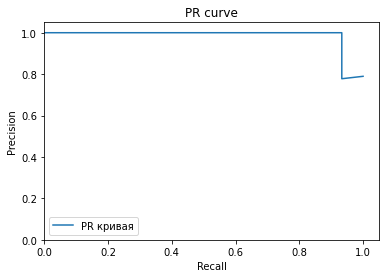

In [19]:
plt.plot(recall, precision, label='PR кривая')

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim((0, 1.05))
plt.ylim((0, 1.05))
plt.legend(loc="lower left")
plt.show()